In [42]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [43]:
def plotClass(X,y,p):
    plt.figure()
    for i in range(y.shape[1]):
        if y[0,i]==0:
            plt.plot(X[0,i],X[1,i],'r'+p)
        else:
            plt.plot(X[0,i],X[1,i],'b'+p)
            
    plt.show()

(2, 200)
(1, 200)


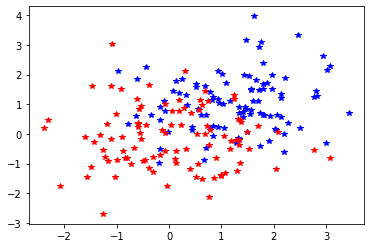

In [44]:
num_data=100 # data points per class

x1=np.random.randn(2,num_data)+1
x0=np.random.randn(2,num_data)

y1=np.ones((1,num_data))
y0=np.zeros((1,num_data))

x=np.concatenate((x1,x0),axis=1)
y=np.concatenate((y1,y0), axis=1)
X=x
print(X.shape)

print(y.shape)


plt.plot(x[0,:100],x[1,:100],'b*')
plt.plot(x[0,100:],x[1,100:],'r*')

In [17]:
X.shape

(2, 200)

In [25]:
def getZ(w,x,b):
  return w@x + b

def sigmoid(z):
  return (1/(1+np.exp(-z)))

def loss(y,yhat):
  return np.sum(-y*np.log(yhat)-(1-y)*np.log(1-yhat), 1)

In [45]:
input = 2
h_layer1 = 100
h_layer2 = 50
output = 1


w1 = np.random.random((h_layer1,input))
b1 = np.zeros((h_layer1, 1))

w2 = np.random.random((h_layer2, h_layer1))
b2 = np.zeros((h_layer2, 1))

w3 = np.random.random((output,h_layer2))
b3 = np.zeros((output,1))

ls = []
lr = 0.01

for i in range(10000):
  #forword
  z1 = getZ(w1,X,b1)
  A1 = sigmoid(z1)

  z2 = getZ(w2,A1,b2)
  A2 = sigmoid(z2)

  z3 = getZ(w3,A2,b3)
  A3 = sigmoid(z3)

  #Back propagation
  l = loss(y,A3)
  ls.append(l)

  dz3 = A3 - y
  dw3 = dz3@A2.T
  db3 = np.sum(dz3,1,keepdims = True)

  dz2 = (w3.T@dz3)*(A2*(1-A2))
  dw2 = dz2@A1.T
  db2 = np.sum(dz2,1, keepdims = True)

  dz1 = (w2.T@dz2)*(A1*(1-A1))
  dw1 = dz1@X.T
  db1 = np.sum(dz1,1, keepdims = True)

  w3 = w3-lr*dw3
  b3 = b3-lr*db3
  w2 = w2-lr*dw2
  b2 = b2-lr*db2
  w1 = w1-lr*dw1
  b1 = b1-lr*db1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


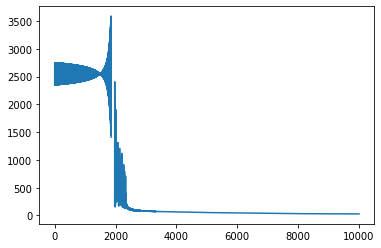

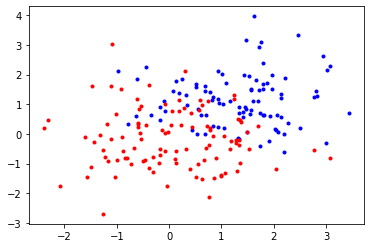

In [46]:
plt.plot(ls)
plotClass(X,A3>0.5,'.')